<h1 style="text-align: center;">GLOBAL SOLUTION 2024</h1>

## Grupo: Guilherme Pagani (1), Leonardo Garcia (2), Rodrigo Cabrera (3) // RMs: 99445 (1), 99471 (2), 550227 (3).

<h1 style="text-align: center;">Resolução</h1>

### Imports Necessários 


In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT
import numpy as np
import random as rd
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler, PrimitiveJob

<h1 style="text-align: center;">1. Primeiro Passo</h1>
<strong>
Inicialmente, deve-se projetar um algoritmo que constroi um circuito quantico capaz de receber uma sequencia n de medições de tempo referente ao periodo medido das ondas em uma regiao litoranea (em segundos), converte-las para portas de phase P de acordo com a equação apresentada, obter o periodo correspondente por meio da IQFT e compara-lo com o valor medio dos periodos.
</strong>


### 1.1
*Na seguinte parte, geramos um número aleatório cujo definirá quantos qubits haverá no circuito, esse número aleatório representa medições de tempo, ou seja, quantos períodos teve em certo tempo, adicionamos em uma lista para separar cada item*

In [6]:
medicoes_lista = [] # Lista para armazenar os periodos da medição
n = rd.randint(4,10) # Número de medições de tempo realizadas

for i in range(n):
    j = round(rd.uniform(2,5),2) # Número dos periodos
    medicoes_lista.append(j)

print("Número de Medições:",n)
print("Períodos =",medicoes_lista)

Número de Medições: 7
Períodos = [4.77, 3.86, 2.88, 2.01, 4.54, 3.6, 2.21]


### 1.2
*Implementação da IQFT*

Circuito IQFT


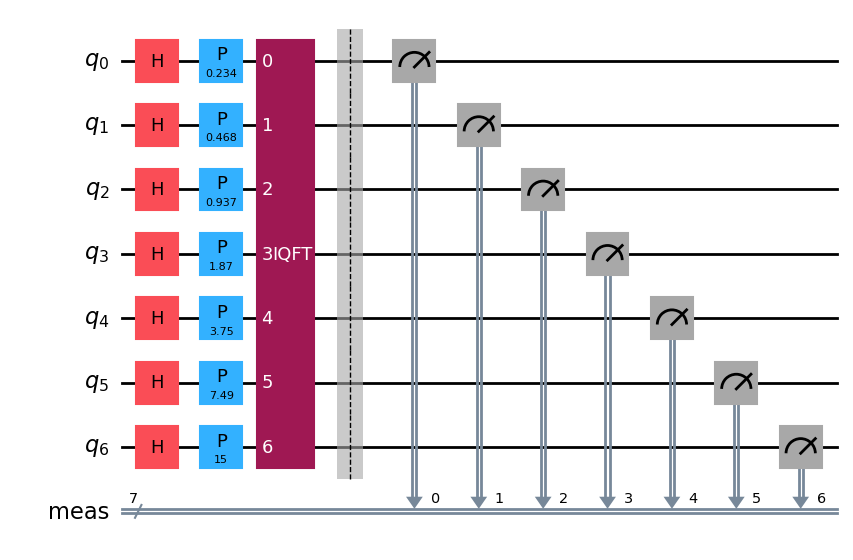

Circuito IQFT


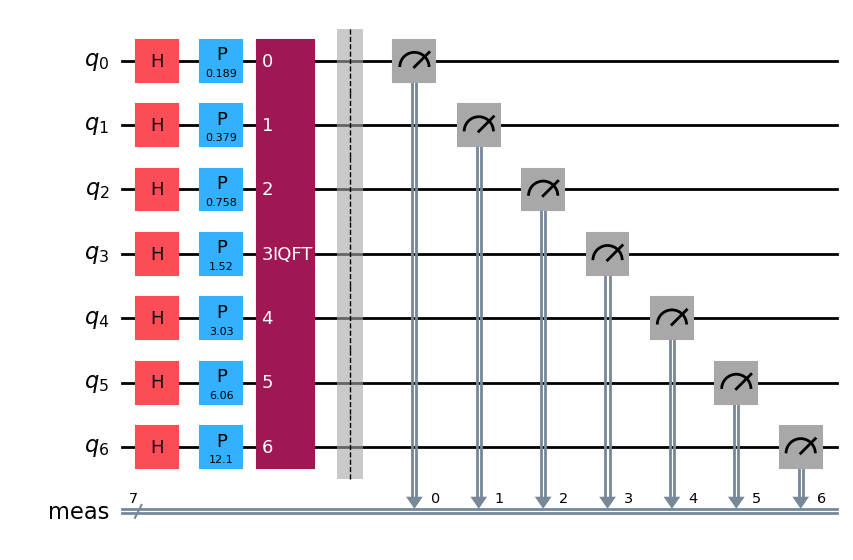

Circuito IQFT


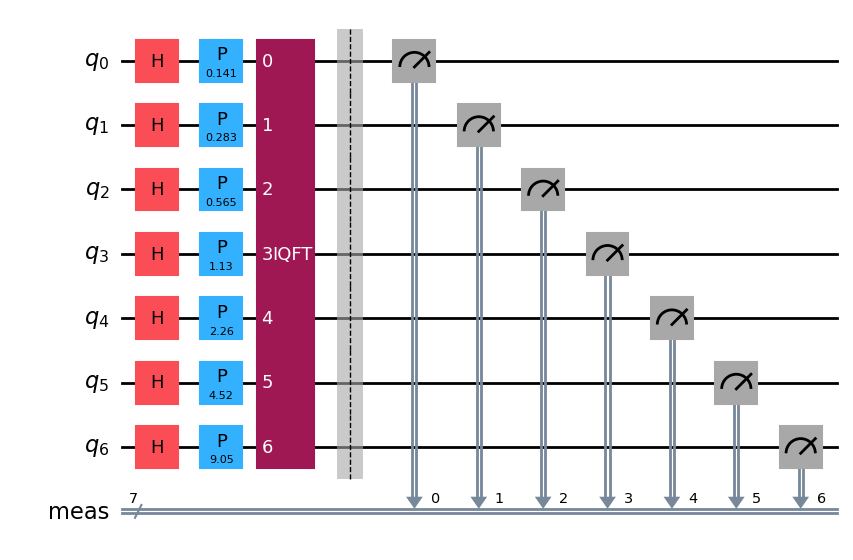

Circuito IQFT


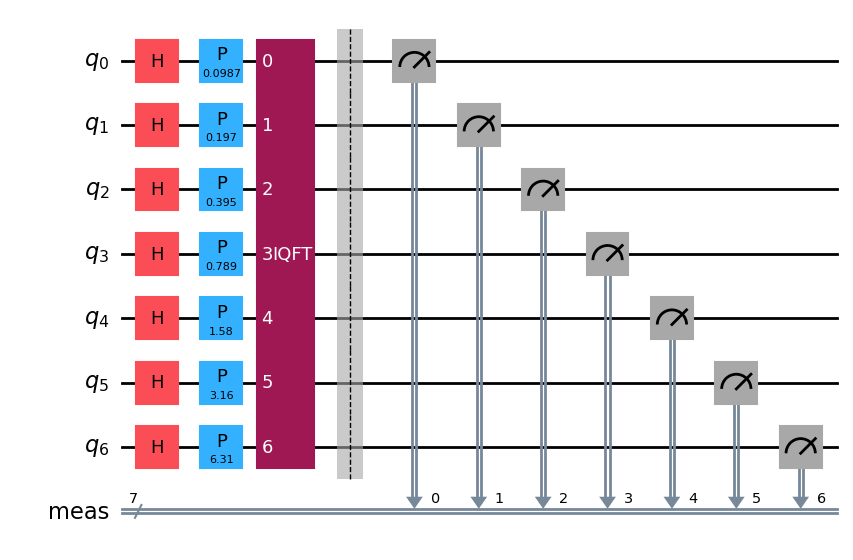

Circuito IQFT


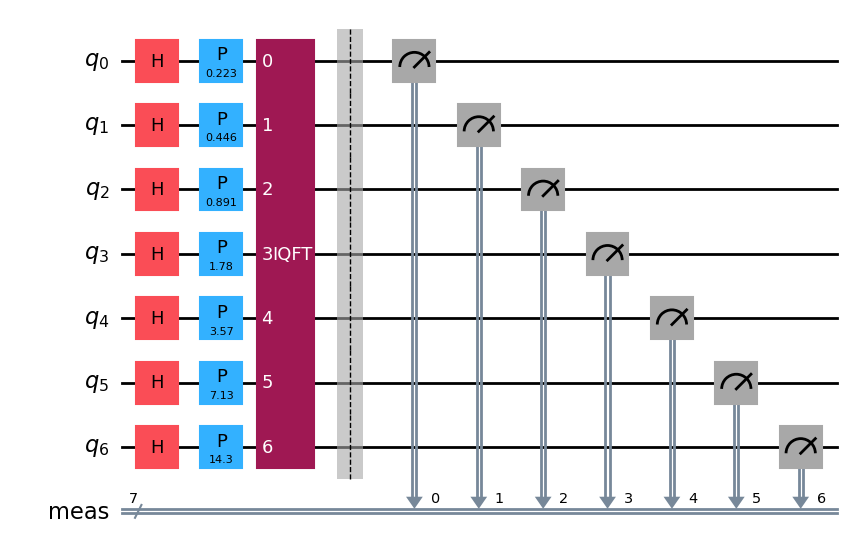

Circuito IQFT


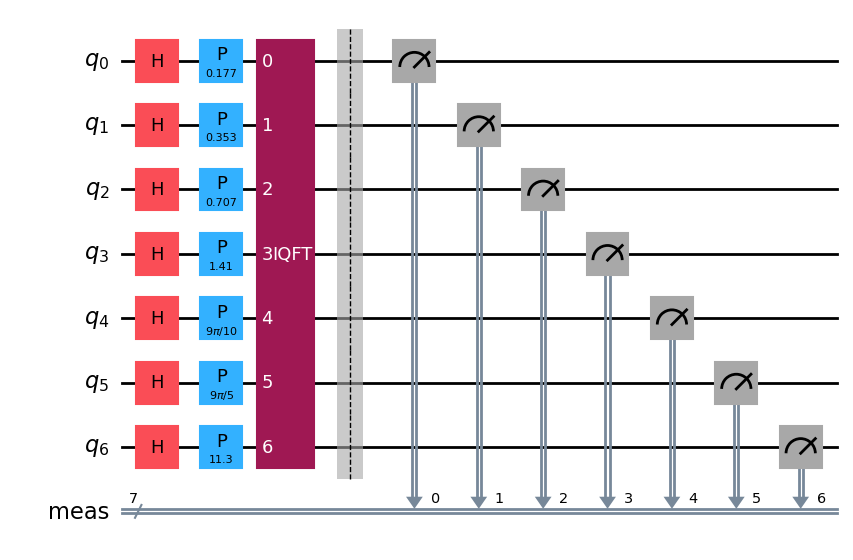

Circuito IQFT


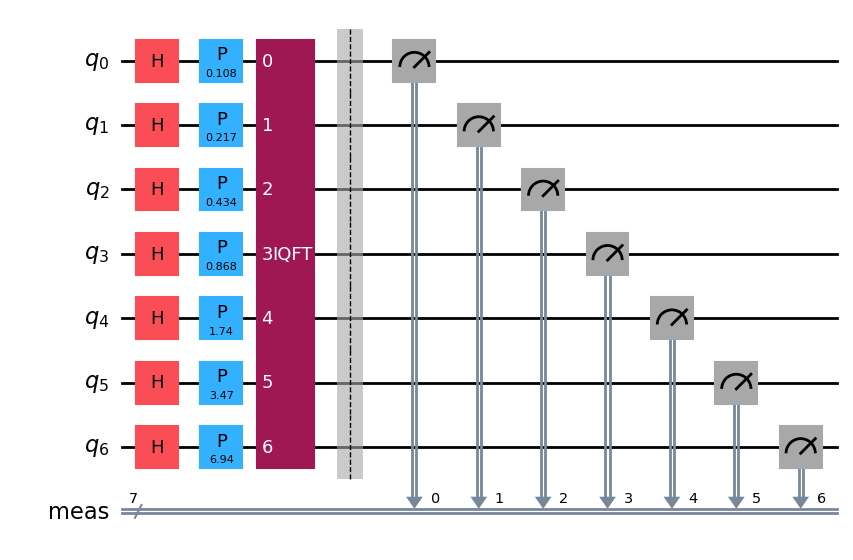

Períodos calculados = [5, 9, 3, 4, 47, 6, 10, 8, 30, 120, 23, 7, 22, 13, 0, 29, 1, 15, 2, 11, 122, 14, 127, 124, 126, 4, 5, 12, 1, 0, 6, 2, 3, 7, 127, 30, 10, 42, 8, 14, 9, 106, 3, 2, 6, 4, 118, 5, 0, 1, 9, 8, 2, 3, 5, 4, 7, 3, 6, 115, 2, 8, 9, 122, 19, 100, 0, 127, 63, 102, 10, 83, 14, 18, 111, 125, 113, 54, 120, 1, 11, 20, 97, 47, 13, 17, 116, 126, 108, 60, 3, 4, 5, 7, 2, 8, 0, 6, 1, 17, 11, 100, 77, 124, 99, 125, 22, 126, 26, 9, 12, 104, 127, 111, 121, 117, 66, 39, 42, 27, 123, 2, 0, 3, 8, 1, 7, 4, 5, 35, 122, 126, 38, 110, 11, 18, 127, 124, 26, 70, 6, 30, 118]


In [7]:
def fourrier_quantum(num_qubits,medicoes_lista):
    
    periodos = []

    for i, periodo in enumerate(medicoes_lista):
        
        qc = QuantumCircuit(num_qubits)

        for i in range (num_qubits):
            qc.h(i)
            theta = 2 * np.pi * periodo * (2 ** i) / (2 ** num_qubits)
            qc.p(theta, i)

        qc.append(QFT(num_qubits, inverse=True), qc.qubits)

        qc.measure_all()
        print("Circuito IQFT")
        display(qc.draw('mpl'))

        sampler = StatevectorSampler()
        pub = (qc)
        job_sampler = sampler.run([pub], shots=1024)

        result_sampler = job_sampler.result()
        counts_sampler = result_sampler[0].data.meas.get_counts()


        for bitstring, count in counts_sampler.items():
            value = int(bitstring, 2)
            periodos.append(value)
        
    return periodos

periodos_resultados = fourrier_quantum(n, medicoes_lista)
print("Períodos calculados =", periodos_resultados)